In [4]:
##############################################
# Modeling    
##############################################
from tensorflow.keras import layers, models
from sklearn import preprocessing

def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    """ Keras 모델 시작 """

    model.add(layers.Dense(Nh, activation="relu", input_shape=(Nin,)))
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu  """

    model.add(layers.Dense(Nout, activation="relu"))
    """출력 노드 수 Nout 개,  활성함수는  relu) """

    model.compile(loss="mse", optimizer="sgd")
    """ cost함수 - mse – 평균 제곱 오차  최적화  알고리즘 -SGD(확률적 경사하강법) 
    """

    return model

In [5]:
##############################################
# Data  학습과 평가용 데이터 불러오기 
##############################################
from tensorflow.keras import datasets

def Data_func():  
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler() # 데이터 정규화  
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)
    #print (X_train.shape, y_train.shape )
    
    return (X_train, y_train), (X_test, y_test)


Epoch 1/100
4/4 - 1s - loss: 558.6895 - val_loss: 494.5384
Epoch 2/100
4/4 - 0s - loss: 269.6205 - val_loss: 159.5216
Epoch 3/100
4/4 - 0s - loss: 101.3867 - val_loss: 74.8126
Epoch 4/100
4/4 - 0s - loss: 77.4013 - val_loss: 65.4249
Epoch 5/100
4/4 - 0s - loss: 61.9992 - val_loss: 88.0852
Epoch 6/100
4/4 - 0s - loss: 59.1875 - val_loss: 61.8824
Epoch 7/100
4/4 - 0s - loss: 51.5172 - val_loss: 49.6657
Epoch 8/100
4/4 - 0s - loss: 49.8940 - val_loss: 46.6888
Epoch 9/100
4/4 - 0s - loss: 52.2129 - val_loss: 53.9945
Epoch 10/100
4/4 - 0s - loss: 56.5447 - val_loss: 45.2490
Epoch 11/100
4/4 - 0s - loss: 50.5041 - val_loss: 52.5644
Epoch 12/100
4/4 - 0s - loss: 65.2566 - val_loss: 57.9060
Epoch 13/100
4/4 - 0s - loss: 48.8396 - val_loss: 38.3092
Epoch 14/100
4/4 - 0s - loss: 39.6952 - val_loss: 35.3483
Epoch 15/100
4/4 - 0s - loss: 35.5408 - val_loss: 41.8877
Epoch 16/100
4/4 - 0s - loss: 42.3444 - val_loss: 67.6858
Epoch 17/100
4/4 - 0s - loss: 46.9691 - val_loss: 45.8389
Epoch 18/100
4/4 -

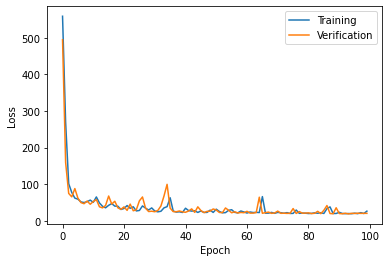

In [6]:
##############################################
# Plotting  결과 그래프 구현 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 

##############################################
# Main  회귀 ANN 학습 및 성능 분석 
##############################################
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=100,\
                       validation_split=0.2, verbose=2)
    
    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    
    history = history.history
    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()